In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import uproot,glob, os


plt.rcParams["figure.figsize"] = (10, 8)

In [129]:
def get_df(filename,nevents=1e17):
    with open(filename, "r") as f:
        d={"Q2":[], "x":[], "pT1":[], "pT2":[], "y1":[], "y2":[], "z1":[], "z2":[], "phi1":[], "phi2":[],
          "p1":[], "p2":[], "thetalab1":[], "thetalab2":[],"philab1":[], "philab2":[],}
        d_lead={"Q2":[], "x":[], "pT1":[], "y1":[], "z1":[], "phi1":[],
          "p1":[],  "thetalab1":[],"philab1":[],}
        pT2s=[]
        phi2s=[]
        y2s=[]
        z2s=[]
        p2s=[]
        thetalab2s=[]
        philab22s=[]
        foundLeading=False
        events=0
        while True:
            line=f.readline()
            if line is not None:
                s=line.split()
            else : break
            if events>nevents:
                break
            if len(s)==0:
                break
            if s[0]=='#':
                nh2=len(pT2s)
                if foundLeading==True:
                    
                    d_lead['Q2'].append(Q2)
                    d_lead['x'].append(x)
                    d_lead['pT1'].append(pT1)
                    d_lead['y1'].append(y1)
                    d_lead['z1'].append(z1)
                    d_lead['p1'].append(p1)
                    d_lead['thetalab1'].append(thetalab1)
                    d_lead['philab1'].append(philab1)
                    d_lead['phi1'].append(phi1)
                    if nh2 >0:
                        d['Q2']+=[Q2]*nh2
                        d['x']+=[x]*nh2
                        d['pT1']+=[pT1]*nh2
                        d['y1']+=[y1]*nh2
                        d['z1']+=[z1]*nh2
                        d['p1']+=[p1]*nh2
                        d['thetalab1']+=[thetalab1]*nh2
                        d['philab1']+=[philab1]*nh2
                        d['phi1']+=[phi1]*nh2
                        d['pT2']+=pT2s
                        d['y2']+=y2s
                        d['z2']+=z2s
                        d['phi2']+=phi2s
                        d['p2']+=p2s
                        d['philab2']+=philab2s
                        d['thetalab2']+=thetalab2s
                    foundLeading=False

                Q2=float(s[1])
                x=float(s[2])
                
                #reset
                pT2s=[]
                phi2s=[]
                y2s=[]
                z2s=[]
                p2s=[]
                thetalab2s=[]
                philab2s=[]
                foundLeading=False
                events+=1
                
                    
            elif s[0]=="211" and float(s[1])>0.5: #leading pi+
                z1=float(s[1])
                pT1=float(s[2])
                phi1=float(s[3])
                y1=float(s[4])
                p1=float(s[5])
                thetalab1=np.pi-float(s[6])
                philab1=float(s[7])
                foundLeading=True
            elif s[0]=="-211" and float(s[1])<0.5: #subleading pi-
                z2s.append(float(s[1]))
                pT2s.append(float(s[2]))
                phi2s.append(float(s[3]))
                y2s.append(float(s[4]))
                p2s.append(float(s[5]))
                thetalab2s.append(np.pi-float(s[6]))
                philab2s.append(float(s[7]))
    return pd.DataFrame(d), pd.DataFrame(d_lead)
            
                

In [13]:
# events={}; events_lead={}
# for A in "D C Fe Pb".split():
#     folder=f"/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweakPtOnly/e{A}"
#     events[A],  events_lead[A]= get_df(sorted(glob.glob(f"{folder}/*.dat"), key=os.path.getmtime)[-1],1e7)
#     print(f"parsed {A}, {len(events[A])} pairs, {len(events_lead[A])} leading")
import pickle as pkl
events={}; events_lead={}
for A in "D C Fe Pb".split():
    folder=f"ehijing_output/"
    with open(f"{folder}/{A}_merged.pkl", "rb") as f:
        events[A],  events_lead[A] = pkl.load(f)
    print(f"parsed {A}, {len(events[A])} pairs, {len(events_lead[A])} leading")

parsed D, 2695942 pairs, 6431931 leading
parsed C, 2477178 pairs, 5214706 leading
parsed Fe, 2129416 pairs, 3839232 leading
parsed Pb, 1744558 pairs, 2599270 leading


(array([[17179., 17807., 20866., 28065., 37875., 43520., 38884., 28891.,
         21718., 18350.],
        [17885., 16462., 17253., 20426., 26951., 37252., 43783., 39707.,
         29446., 21810.],
        [21503., 17415., 15914., 16678., 19616., 26610., 37262., 44515.,
         40382., 29241.],
        [28968., 20881., 16623., 15166., 16368., 19298., 26738., 37747.,
         45403., 40354.],
        [39637., 28179., 20192., 16296., 14854., 15974., 19627., 27150.,
         38872., 46285.],
        [46088., 38787., 27660., 19749., 15979., 15122., 16200., 20263.,
         28289., 40166.],
        [40270., 45698., 37927., 26559., 19690., 16013., 15272., 16684.,
         20842., 29018.],
        [29977., 40088., 44926., 37417., 26815., 19804., 16546., 15642.,
         17242., 21614.],
        [21821., 29431., 39311., 43981., 36772., 26949., 20252., 16896.,
         16641., 17658.],
        [18346., 21727., 28707., 38353., 43601., 37553., 28059., 20848.,
         17710., 17101.]]),
 array([

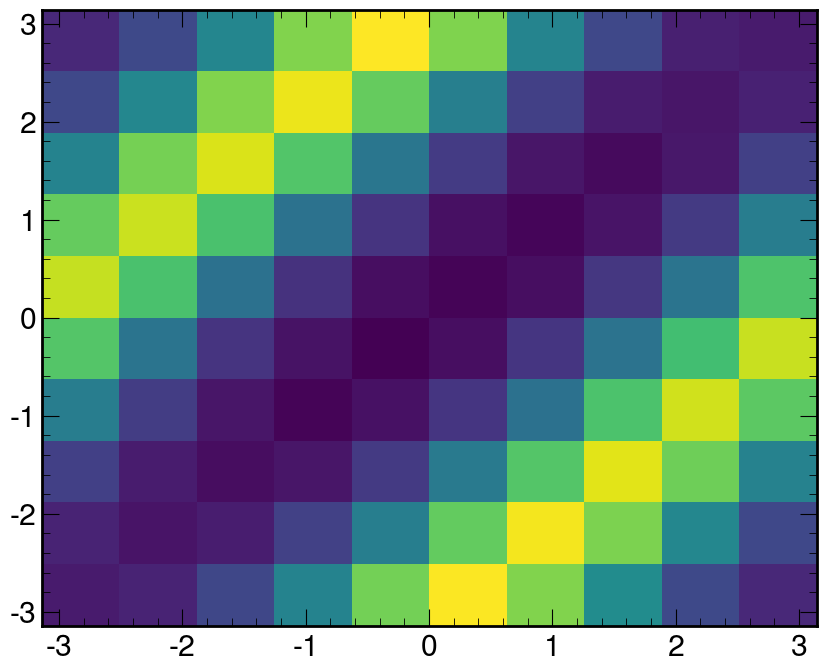

In [14]:
plt.hist2d(events['D'].phi1, events['D'].phi2)

In [15]:
def process(df):
    pi=np.pi
    df['dphi']=df.eval(f"phi1-phi2-(phi1-phi2>{np.pi})*{2*pi}+(phi1-phi2<-{np.pi})*{2*np.pi}")
    df['dy']=df.eval("y1-y2")
    Mp=0.9383
    df['nu']=df.eval(f"Q2/(x*2*{Mp})")
    df['W']=df.eval(f"sqrt({Mp**2}+2*{Mp}*nu-Q2)")
def process_lead(df):
    Mp=0.9383
    df['nu']=df.eval(f"Q2/(x*2*{Mp})")
    df['W']=df.eval(f"sqrt({Mp**2}+2*{Mp}*nu-Q2)")

In [16]:
for A in "D C Fe Pb".split():
    process(events[A])
    process_lead(events_lead[A])

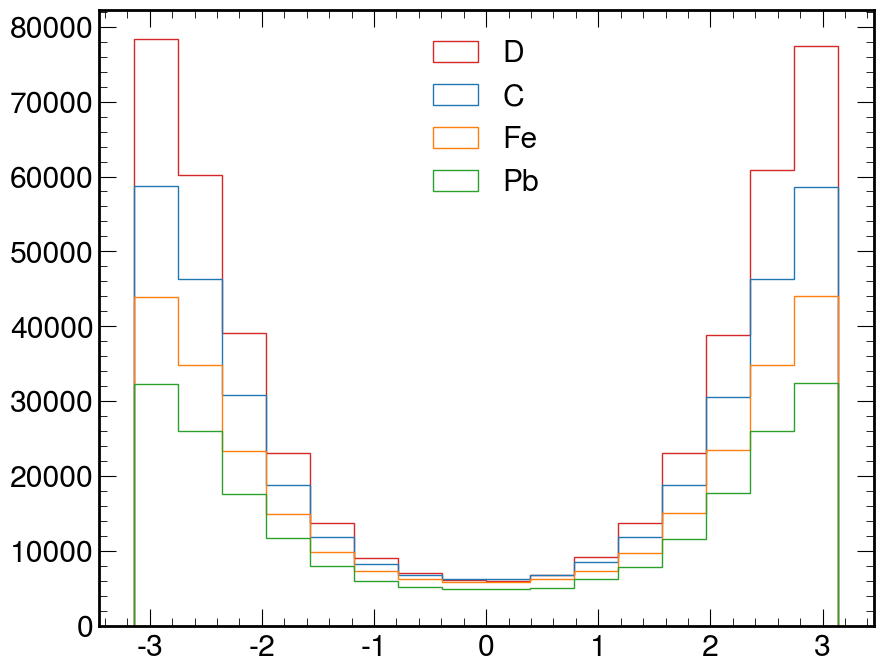

In [17]:
deg=np.pi/180
q=f"pT1>0.25 and pT2>0.25 and Q2>1 and Q2/(x*2*0.9383)>2.2 and Q2/(x*2*0.9383)<4.2 and thetalab1>10*{deg}"
colors='tab:red tab:blue tab:orange tab:green'.split()
for i,A in enumerate("D C Fe Pb".split()):
    plt.hist(events[A].query(q).dphi, bins=np.linspace(-np.pi,np.pi, 17), density=False, histtype='step', 
             label=A, color=colors[i])
    
plt.legend()

In [18]:
deg=np.pi/180
#all_data['all'][0]['D'].C
def getPrediction(q_add=None, q_add_lead=None):
    q=f"pT1>0.25 and pT2>0.25 and Q2>1 and nu>2.2 and nu<4.2 and thetalab1>10*{deg} and W>2"
    q+=f" and ((thetalab2>25*{deg} and p2>0.7) or (thetalab2>30*{deg} and p2>0.5) or (thetalab2>40*{deg} and p2>0.35))"
    q+=f" and z2>0.05 and z2<0.45 and z1>0.5"
    q_lead=f"pT1>0.25 and Q2>1 and nu>2.2 and nu<4.2 and W>2 and thetalab1>10*{deg}"
    if q_add is not None:
        q+= " and " + q_add
    if q_add_lead is not None:
        q_lead+= " and " + q_add_lead
        
    colors='tab:red tab:blue tab:orange tab:green'.split()
    results={}
    for i,A in enumerate("D C Fe Pb".split()):
        #plt.hist(events[A].query(q).dphi, bins=np.linspace(-np.pi,np.pi, 17), density=False, histtype='step', 
        #         label=A, color=colors[i])
        y,x=np.histogram(abs(events[A].query(q).dphi), bins=np.linspace(0,np.pi, 9))
        bc=(x[1:]+x[:-1])/2
        n_lead=len(events_lead[A].query(q_lead))

        width=np.sqrt(np.sum(y*(bc-np.pi)**2)/np.sum(y))
        
        #width=np.sqrt(np.sum(y*(bc-np.pi)**2)/np.sum(y))
        if i==0:
            norm = 2*np.pi/8*sum(y/n_lead)
            width_D=width
        
        #print(width, np.sqrt(width**2-width_D**2))
        
        C=y/n_lead/norm
        dCstat = np.sqrt(y)/n_lead/norm
        phi=bc
        phi_low=x[:-1]
        phi_up=x[1:]

        dwidth=np.sqrt(sum(dCstat**2*(((phi-np.pi)**2-width**2)/sum(C))**2))/(2*width)
        print(A, "%.3f"%width, "+-", "%.3f"%dwidth)
        
        bc=list(bc)+list(reversed(np.pi*2-bc))
        y=np.array(list(y)+list(reversed(y)))

        
        plt.fill_between(bc, (y-np.sqrt(y))/n_lead/norm,  (y+np.sqrt(y))/n_lead/norm,label=A, color=colors[i], alpha=0.5)
        results[A]=pd.DataFrame({'C':C, 'dCstat':dCstat, "phi":phi,"phi_low":phi_low, "phi_up": phi_up})
        results[A]['R'] = results[A]['C']/results['D']['C']
        results[A]['dRstat'] = results[A]['R']*np.hypot(results[A]['dCstat']/results[A]['C'],results['D']['dCstat']/results['D']['C'])
    plt.legend()
    plt.show()
    return results
all_eHIJING={}

D 1.055 +- 0.002
C 1.101 +- 0.002
Fe 1.141 +- 0.002
Pb 1.166 +- 0.003


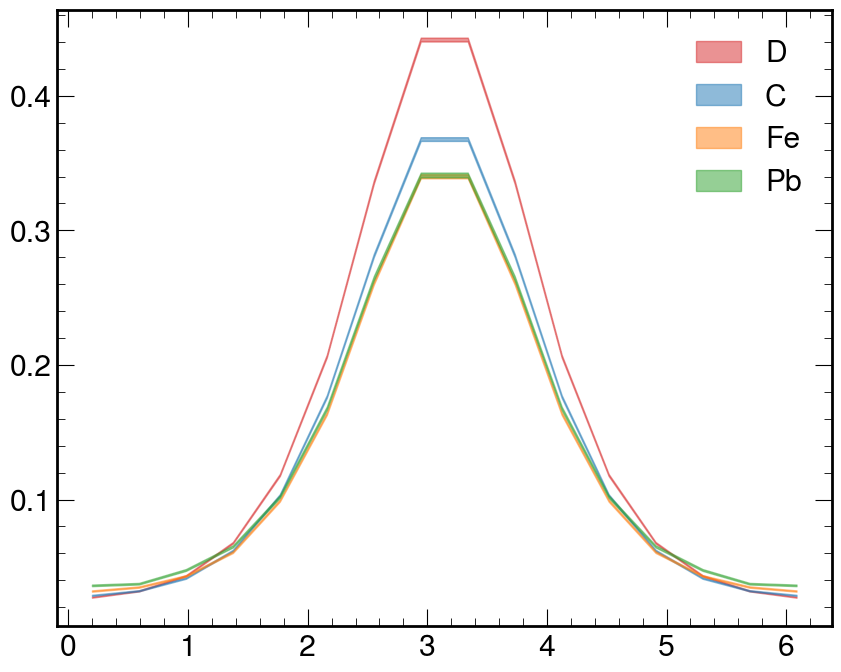

In [19]:
all_eHIJING['all']=[getPrediction()]

dY bins
D 0.799 +- 0.005
C 0.851 +- 0.006
Fe 0.891 +- 0.007
Pb 0.927 +- 0.008


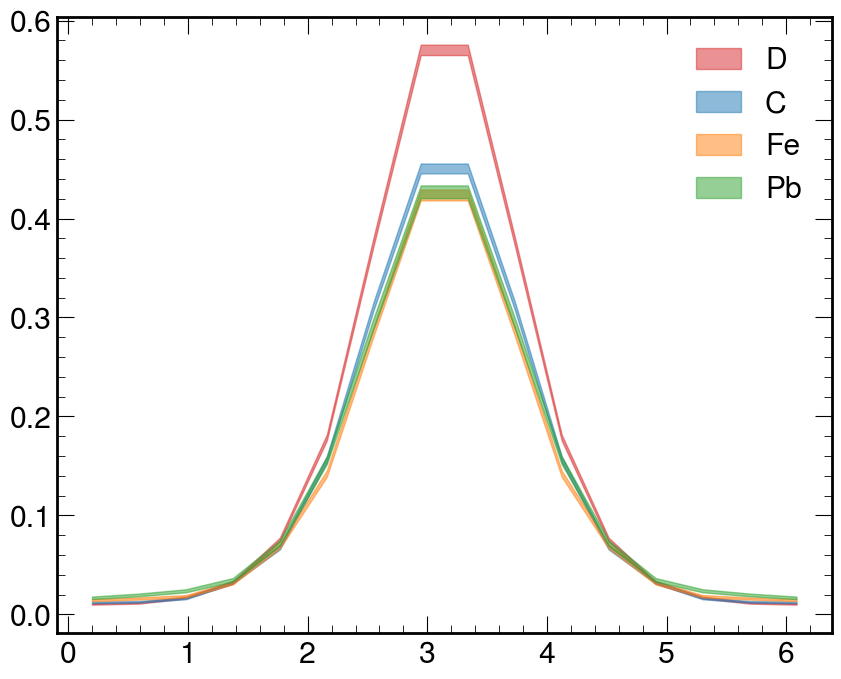

D 1.013 +- 0.002
C 1.064 +- 0.002
Fe 1.109 +- 0.003
Pb 1.130 +- 0.003


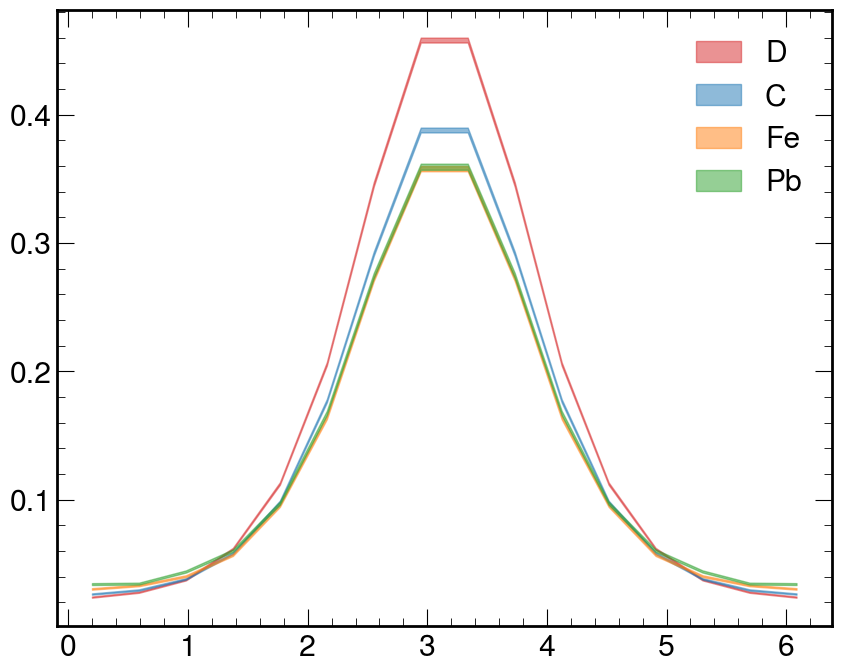

D 1.189 +- 0.003
C 1.225 +- 0.003
Fe 1.257 +- 0.004
Pb 1.286 +- 0.005


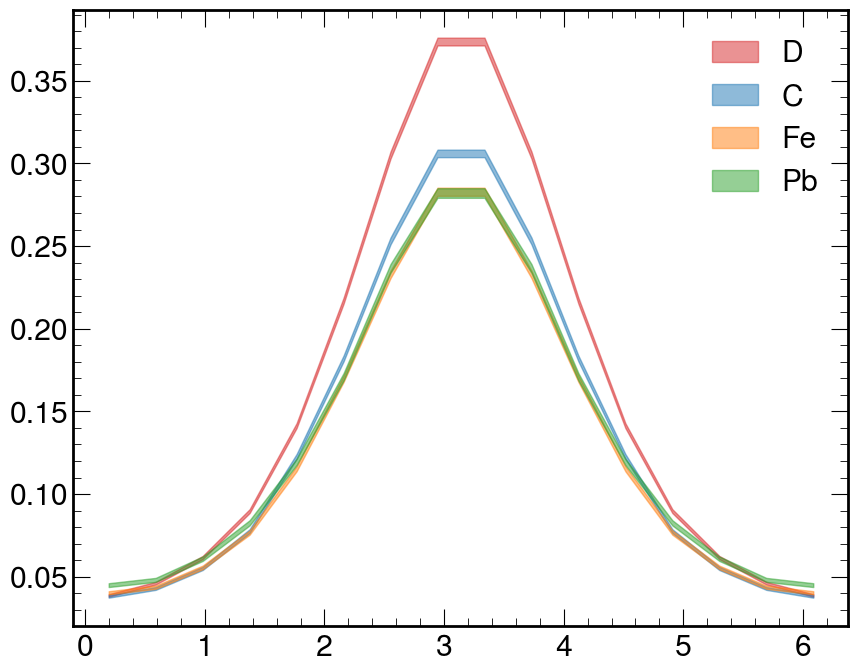

pT1 bins
D 1.285 +- 0.003
C 1.326 +- 0.004
Fe 1.362 +- 0.004
Pb 1.386 +- 0.005


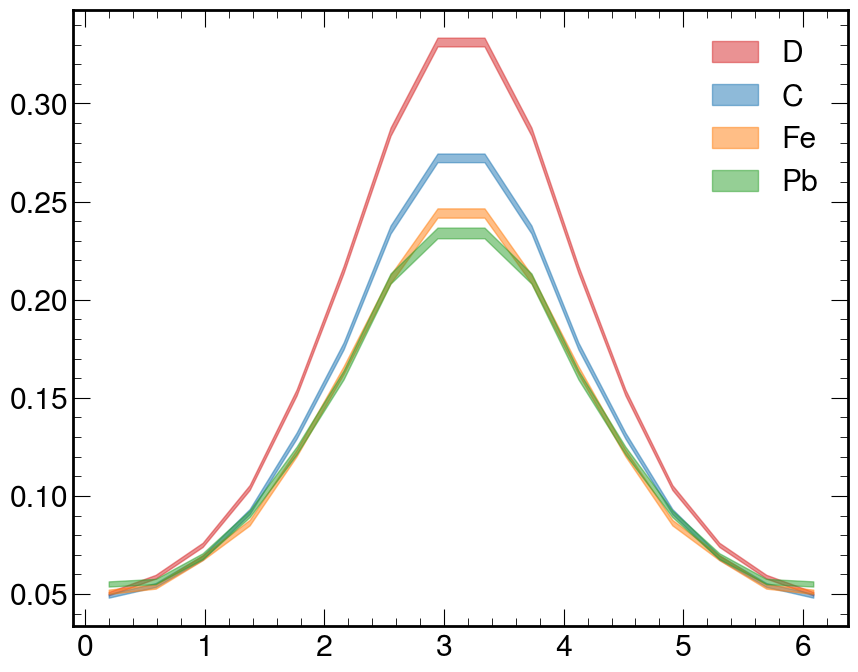

D 1.028 +- 0.002
C 1.083 +- 0.003
Fe 1.130 +- 0.004
Pb 1.157 +- 0.004


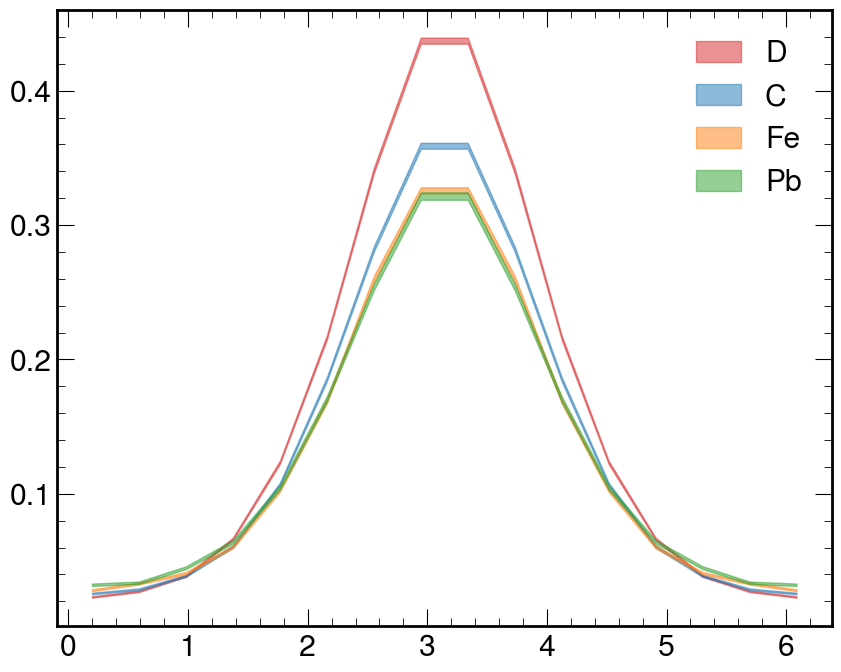

D 0.793 +- 0.003
C 0.872 +- 0.003
Fe 0.928 +- 0.004
Pb 0.963 +- 0.004


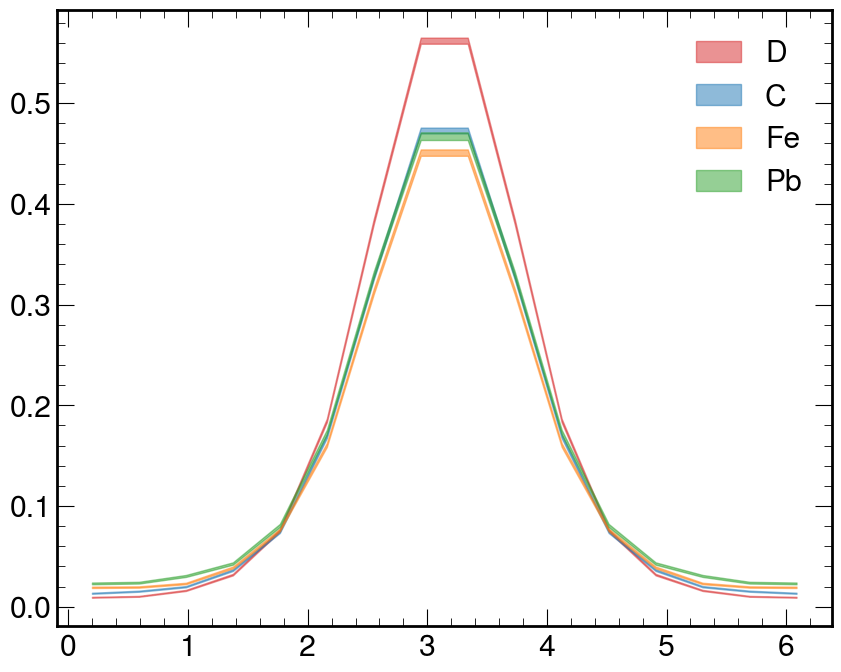

pT2 bins
D 1.209 +- 0.002
C 1.246 +- 0.003
Fe 1.278 +- 0.003
Pb 1.297 +- 0.004


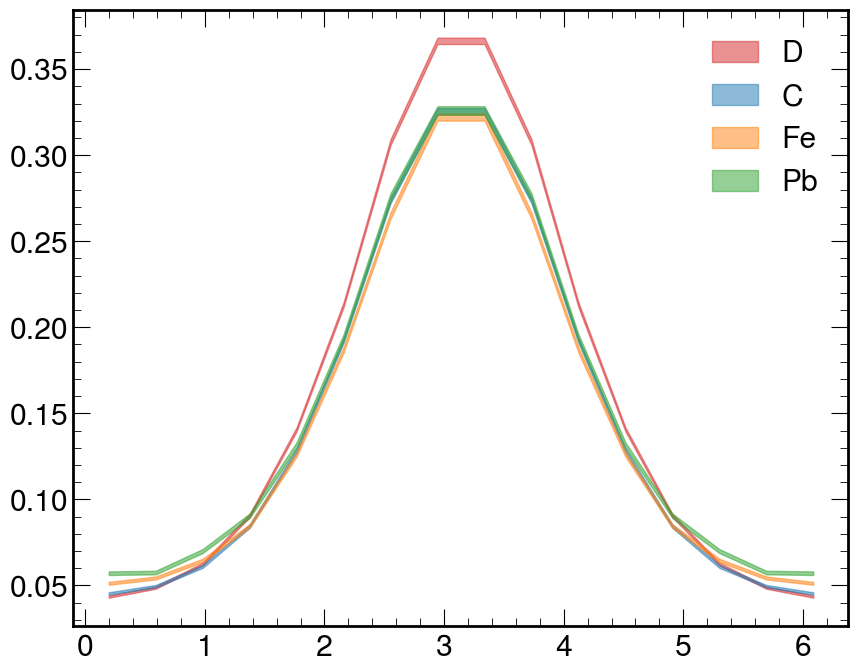

D 0.915 +- 0.002
C 0.951 +- 0.003
Fe 0.978 +- 0.003
Pb 1.005 +- 0.004


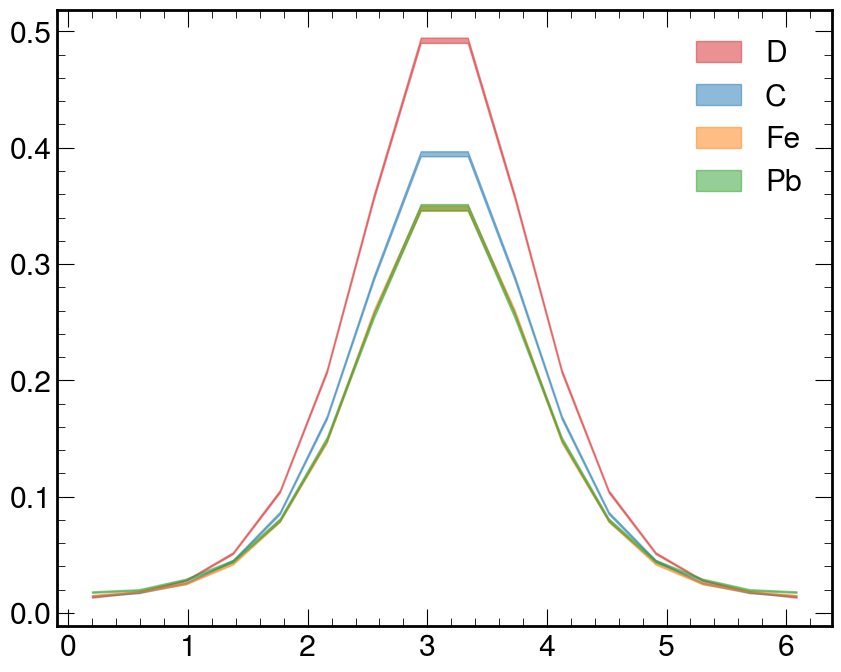

D 0.608 +- 0.004
C 0.628 +- 0.005
Fe 0.675 +- 0.008
Pb 0.715 +- 0.010


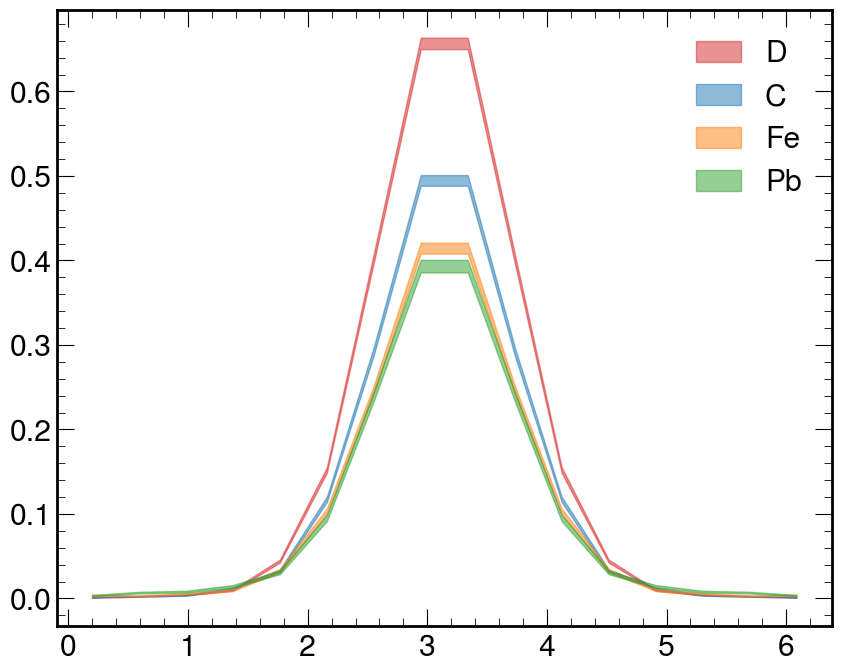

In [20]:
print("dY bins")
all_eHIJING['dY']=[getPrediction(f"{v1}<dy and dy<{v2}") for v1, v2 in [(-0.5, 0.5), (0.5, 1.5), (1.5, 2.5)]]
print("pT1 bins")
all_eHIJING['pT1']=[getPrediction(f"{v1}<pT1 and pT1<{v2}", f"{v1}<pT1 and pT1<{v2}") \
                    for v1, v2 in [(0.25, 0.4), (0.4, 0.6), (0.6, 1.0)]]
print("pT2 bins")
all_eHIJING['pT2']=[getPrediction(f"{v1}<pT2 and pT2<{v2}") for v1, v2 in [(0.25, 0.4), (0.4, 0.6), (0.6, 0.8)]]

In [21]:
import pickle
with open("eHIJING_results.pkl", "wb") as f:
    pickle.dump(all_eHIJING, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.hist(events['D'].query(q).eval(f"W"), bins=100)
plt.show()

In [80]:
print(q)

pT1>0.25 and pT2>0.25 and Q2>1 and Q2/(x*2*0.9383)>2.2 and Q2/(x*2*0.9383)<4.2 and thetalab1>10*0.017453292519943295


In [2]:
plt.hist(events['D'].Q2)

NameError: name 'events' is not defined